<a href="https://colab.research.google.com/github/rvalarezo/data_analytics/blob/main/Crash%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# Download latest version
path = kagglehub.dataset_download("oktayrdeki/traffic-accidents")
print("Path to dataset files:", path)

100%|██████████| 4.64M/4.64M [00:00<00:00, 59.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/oktayrdeki/traffic-accidents/versions/1


In [8]:
df = pd.read_csv(path + "/traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [9]:
df.shape

(209306, 24)

In [10]:
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [11]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


# Crash Type

In [61]:
df['crash_type'].value_counts()

,count
crash_type,
NO INJURY / DRIVE AWAY,117376
INJURY AND / OR TOW DUE TO CRASH,91930


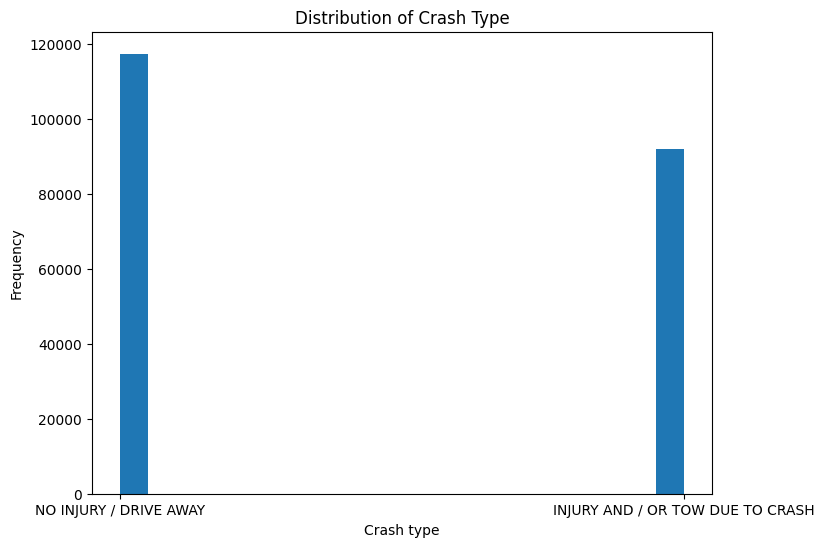

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(df['crash_type'].dropna(), bins=20)  # Handle potential missing values
plt.xlabel('Crash type')
plt.ylabel('Frequency')
plt.title('Distribution of Crash Type')
plt.show()

# Crash Month

In [78]:
table_month = df['crash_month'].value_counts()
mode_month = df['crash_month'].mode()
print("Distribution of month of the crash",table_month)
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
print("Crashes happends more frequently on: ",calendar.month_name[mode_month.values[0]])

Distribution of month of the crash crash_month
10    20089
9     19018
12    18816
8     18350
11    18328
6     17851
7     17834
5     17432
1     16606
3     15265
4     15096
2     14621
Name: count, dtype: int64
Crashes happends more frequently on:  October


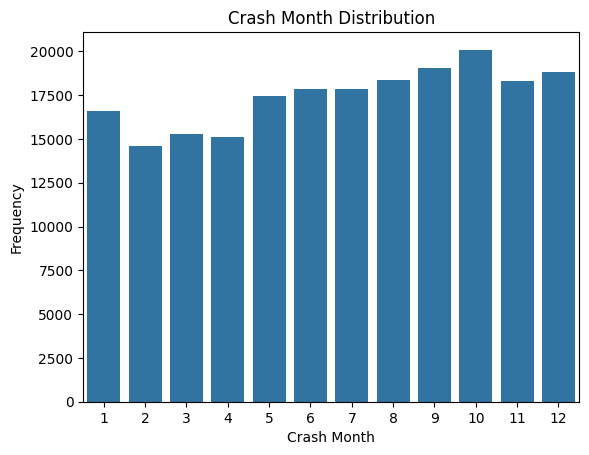

<Figure size 1200x600 with 0 Axes>

In [58]:
sns.countplot(x='crash_month', data=df)
plt.title('Crash Month Distribution')
plt.xlabel('Crash Month')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 6))
plt.show()

# Crash day of the week

In [81]:
key = "crash_day_of_week"
table= df[key].value_counts()
mode = df[key].mode()
print(f"Distribution of: {key}",table)
print("Crashes happends more frequently on: ",calendar.day_name[mode.values[0]-1])

Distribution of: crash_day_of_week crash_day_of_week
6    34458
5    30787
7    30710
4    30093
3    30074
2    27938
1    25246
Name: count, dtype: int64
Crashes happends more frequently on:  Saturday


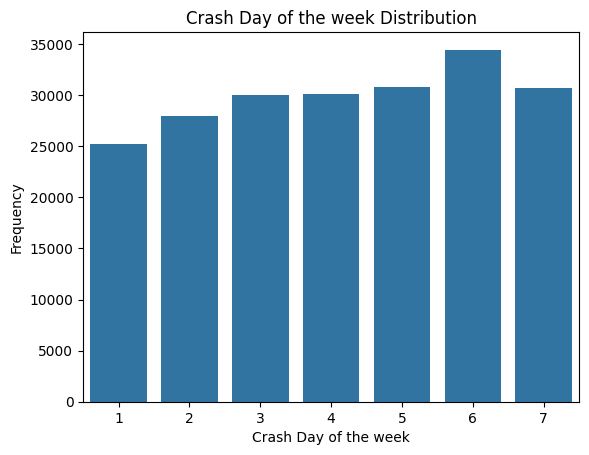

<Figure size 1200x600 with 0 Axes>

In [80]:
sns.countplot(x='crash_day_of_week', data=df)
plt.title('Crash Day of the week Distribution')
plt.xlabel('Crash Day of the week')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 6))
plt.show()

# CRASH HOUR

In [82]:
key = "crash_hour"
table= df[key].value_counts()
mode = df[key].mode()
print(f"Distribution of: {key}",table)
print("Crashes happends more frequently on: ",mode.values[0])

Distribution of: crash_hour crash_hour
17    16097
16    16025
15    15894
18    13431
14    13349
13    11949
12    11726
8     11381
11    10052
19     9683
7      9405
9      9300
10     8990
20     8219
21     7472
22     7035
23     5943
6      4772
0      4487
1      3729
2      3080
5      2819
3      2364
4      2104
Name: count, dtype: int64
Crashes happends more frequently on:  17


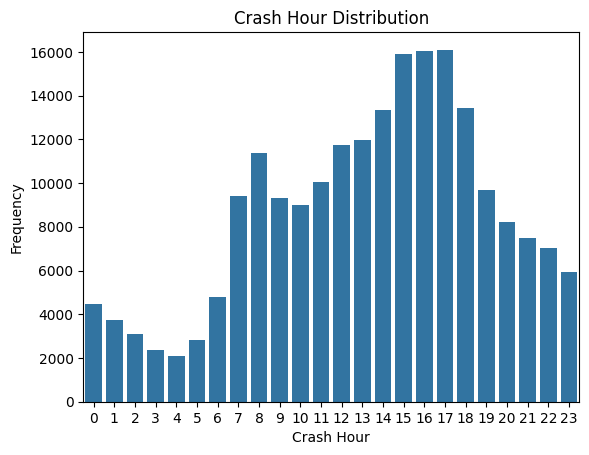

<Figure size 1200x600 with 0 Axes>

In [57]:
sns.countplot(x='crash_hour', data=df)
plt.title('Crash Hour Distribution')
plt.xlabel('Crash Hour')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 6))
plt.show()

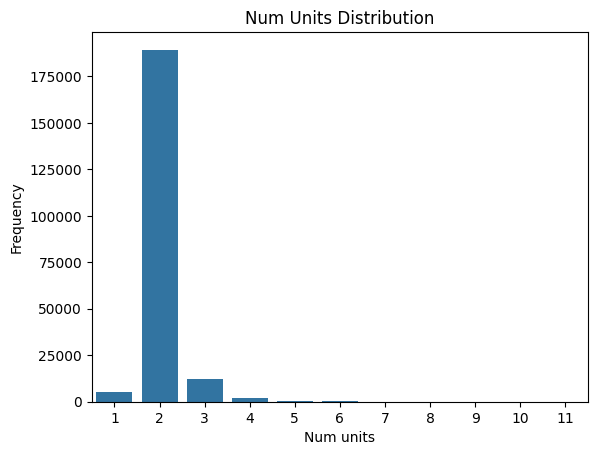

<Figure size 1200x600 with 0 Axes>

In [55]:
sns.countplot(x='num_units', data=df)
plt.title('Num Units Distribution')
plt.xlabel('Num units')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 6))
plt.show()